# Big Data Essentials
#### L4: Statistical Modeling with Python


<br>
<br>
<br>
<br>
Yanfei Kang <br>
yanfeikang@buaa.edu.cn <br>
School of Economics and Management <br>
Beihang University <br>
http://yanfei.site <br>


<br>
<br>

# Basic python modules for Statistics 


# `NumPy`

`NumPy` is short for Numerical Python, is the foundational package for scientific computing in Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities



### Readings
- [NumPy Reference](http://docs.scipy.org/doc/numpy/reference/)
- [NumPy User Guide](http://docs.scipy.org/doc/numpy/user/index.html)

# `SciPy `

`SciPy` is a collection of packages addressing a number of different standard problem domains in scientific computing. Here is a sampling of the packages included:

- `scipy.integrate` : numerical integration routines and differential equation solvers.
- `scipy.linalg` : linear algebra routines and matrix decompositions extending beyond those provided in `numpy.linalg`.
- `scipy.optimize` : function optimizers (minimizers) and root finding algorithms.
- `scipy.signal` : signal processing tools.
- `scipy.stats` : standard continuous and discrete probability distributions (density functions, samplers, continuous distribution functions), various statistical tests, and more descriptive statistics.
- `scipy.cluster` :	Clustering algorithms
- `scipy.interpolate` : Interpolation and smoothing splines
- `scipy.ndimage` : N-dimensional image processing

### Readings
[SciPy Reference Guide](http://docs.scipy.org/doc/scipy/reference/)

# `pandas`

`pandas` provides rich data structures and functions designed to make working with structured data fast, easy, and expressive. `pandas` rounds up the capabilities of `Numpy`, `Scipy` and `Matplotlib`.

- Primary data structures: `Series` and `DataFrame`.
- Index objects enabling both simple axis indexing and multi-level / hierarchical axis indexing.
- An integrated group by engine for aggregating and transforming data sets.
- Date range generation (date_range) and custom date offsets enabling the implementation of customized frequencies
- Input/Output tools: loading tabular data from flat files (CSV, delimited, Excel 2003), and saving and loading pandas objects from the fast and efficient PyTables/HDF5 format.
- Memory-efficient “sparse” versions of the standard data structures for storing data that is mostly missing or mostly constant (some fixed value).
- Moving window statistics (rolling mean, rolling standard deviation, etc.)
- Static and moving window linear and panel regression.

### Readings
[pandas Documentation](https://pandas.pydata.org/docs/pandas.pdf)

# Visualization

- `matplotlib` is the most popular Python library for producing plots and other 2D data visualizations. 
- `seaborn` is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

### Readings
- [matplotlib](https://matplotlib.org/)
- [seaborn](https://seaborn.pydata.org/)

<br>
<br>

#  Working with Data 


# Read and write data in Python with `stdin` and `stdout` 

In [12]:
cat ./code/L3/line_count.py

#! /usr/bin/env python3

import sys
count = 0
data = []
for line in sys.stdin:
    count += 1
    data.append(line)

print("Total ",count, "lines read.") # print goes to sys.stdout
#print(data)


Then launch a terminal and first make your Python script executable. Then send your file to your Python script

```
chmod +x line_count.py
```

In [13]:
cat BDE-L3-git.ipynb | ./code/L3/line_count.py

Total  340 lines read.


# Read from and write to files directly 

You can also explicitly read from and write to files directly in your code. Python makes working with files pretty simple.

- The first step to working with a text file is to obtain a file object using `open()`

    'r' means read-only
       
        file_for_reading = open('reading_file.txt', 'r')
       
    'w' is write -- will destroy the file if it already exists!
           
        file_for_writing = open('writing_file.txt', 'w')
           
    'a' is append -- for adding to the end of the file

        file_for_appending = open('appending_file.txt', 'a')
            
- The second step is do something with the file.
- Don't forget to close your files when you're done.
        
        file_for_writing.close()
    
**Note** Because it is easy to forget to close your files, you should always use them in a **with** block, at the end of which they will be closed automatically:

    with open(filename,'r') as f:
        data = function_that_gets_data_from(f)

In [36]:
cat ./code/L3/hash_check.py

#! /usr/bin/env python3

import re
starts_with_hash = 0

# look at each line in the file use a regex to see if it starts with '#' if it does, add 1
# to the count.

with open('~/lectures/code/L3/line_count.py','r') as file:
    for line in file:
        if re.match("^#",line):
            starts_with_hash += 1
print(starts_with_hash)


# Read a CSV file 

- If your file has no headers, you can use `csv.reader()` in `csv` module to iterate over the rows, each of which will be an appropriately split list.

- If your file has headers, you can either 
    - skip the header row (with an initial call to `reader.next()`), or
    - get each row as a `dict` (with the headers as keys) by using `csv.DictReader()`.

In [1]:
#! /usr/bin/python3

data = []
file = open('data/stocks.csv','r')
next(file)
for line in file:
    data.append(line)

print(data[0])

AAPL	2015-01-23	112.98



In [2]:
#! /usr/bin/env python3

import csv

data = {'date':[], 'symbol':[], 'closing_price' : []}
with open('data/stocks.csv', 'r') as f:
    reader = csv.DictReader(f, delimiter='\t')
    for row in reader:
        data['date'].append(row["date"])
        data['symbol'].append(row["symbol"])
        data['closing_price'].append(float(row["closing_price"]))

In [3]:
data.keys()

dict_keys(['date', 'symbol', 'closing_price'])

Alternatively, `pandas` provides `read_csv()` function to read csv files.

In [4]:
#! /usr/bin/env python3

import pandas

data2 = pandas.read_csv('data/stocks.csv', delimiter='\t',header=None)
print(len(data2))
print(type(data2))

16556
<class 'pandas.core.frame.DataFrame'>


The pandas I/O API is a set of top level `reader` functions accessed like `read_csv()` that generally return a pandas object. These functions includes

    read_excel
    read_hdf
    read_sql
    read_json
    read_msgpack (experimental)
    read_html
    read_gbq (experimental)
    read_stata
    read_sas
    read_clipboard
    read_pickle
    
See [pandas IO tools](http://pandas.pydata.org/pandas-docs/stable/io.html) for detailed explanation.

<br>
<br>

# Fitting linear regression models

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin
import seaborn as sns

In [6]:
# Data available at https://www.kaggle.com/puxama/bostoncsv
# Contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. 
boston = pd.read_csv('./data/Boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<AxesSubplot:xlabel='lstat', ylabel='medv'>

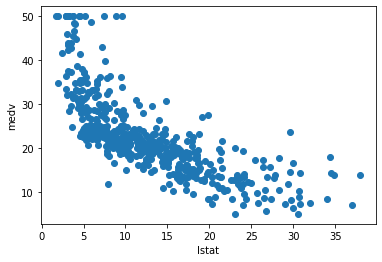

In [16]:
boston.plot(x = 'lstat', y = 'medv', style = 'o', legend=False, ylabel = 'medv')

# Recall the linear regression model

$$Y_i = \beta_0 + \beta_1 x_i + \epsilon_i,~i=1, \cdots, n,~\textrm{where}~\epsilon_i \sim N(0,\sigma^2).$$

We want to minimize 

$$f(\beta_0, \beta_1) =  \sum\limits_{i=1}^n e_i^2 = \sum\limits_{i=1}^n(y_i - (\beta_0 + \beta_1x_i))^2.$$


# Linear regression model

What is the distribution of $Y_i$?

 <img src="./figs/lmcd3d.png" width="600">

In [8]:
sum_of_squares = lambda beta, x, y: np.sum((y - beta[0] - beta[1]*x) ** 2)
sum_of_squares([0,0.7], boston.lstat, boston.medv)

184221.366967

However, we have objective of minimizing the sum of squares, so we can pass this function to one of several optimizers in `SciPy`.

In [9]:
help(fmin)

Help on function fmin in module scipy.optimize.optimize:

fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None, full_output=0, disp=1, retall=0, callback=None, initial_simplex=None)
    Minimize a function using the downhill simplex algorithm.
    
    This algorithm only uses function values, not derivatives or second
    derivatives.
    
    Parameters
    ----------
    func : callable func(x,*args)
        The objective function to be minimized.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to func, i.e., ``f(x,*args)``.
    xtol : float, optional
        Absolute error in xopt between iterations that is acceptable for
        convergence.
    ftol : number, optional
        Absolute error in func(xopt) between iterations that is acceptable for
        convergence.
    maxiter : int, optional
        Maximum number of iterations to perform.
    maxfun : number, optional
        Maximum number of function ev

In [22]:
x = boston.lstat
y = boston.medv
b0, b1 = fmin(sum_of_squares, [0,1], (boston.lstat, boston.medv))
b0, b1

Optimization terminated successfully.
         Current function value: 19472.381418
         Iterations: 82
         Function evaluations: 157


(34.55385886222141, -0.9500515380716178)

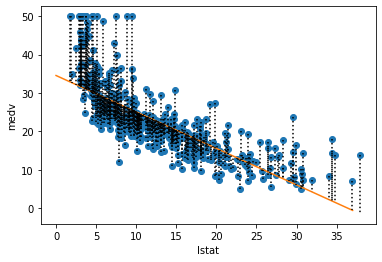

In [29]:
ax = boston.plot(x='lstat', y='medv', style='o', legend=False, ylabel= 'medv')
ax.plot([0,37], [b0, b0+b1*37])
for xi, yi in zip(x,y):
    ax.plot([xi, xi], [yi, b0+b1*xi], 'k:')

# Polynomial regession
We are not restricted to a straight-line regression model; we can represent a curved relationship between our variables by introducing polynomial terms.

Optimization terminated successfully.
         Current function value: 15347.243159
         Iterations: 187
         Function evaluations: 342

intercept: 4.3e+01, x: -2.3, x2: 0.044


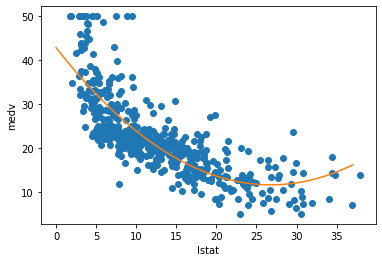

In [19]:
sum_squares_quad = lambda beta, x, y: np.sum((y - beta[0] - beta[1]*x - beta[2]*(x**2)) ** 2)
b0,b1,b2 = fmin(sum_squares_quad, [1,1,-1], args=(x,y))
print('\nintercept: {0:.2}, x: {1:.2}, x2: {2:.2}'.format(b0,b1,b2))
ax = boston.plot(x='lstat', y='medv', style='o', legend=False, ylabel = 'medv')
xvals = np.linspace(0, 37, 100)
ax.plot(xvals, b0 + b1*xvals + b2*(xvals**2))

# Generalized linear models

Often our data violates one or more of the linear regression assumptions:

- non-linear
- non-normal error distribution
- heteroskedasticity
- this forces us to generalize the regression model in order to account for these characteristics.

As a motivating example, we consider the Olympic medals data.

# Linear regression models

- Objective: model the expected value of a continuous variable $Y$, as a linear function of the continuous predictor $X$, $E(Y_i) = \beta_0 + \beta_1X_i$.
- Model structure: $Y_i = \beta_0 + \beta_1X_i + e_i$.
- Model assumptions: $Y$ is is normally distributed, errors are normally distributed, $e_i \sim N(0, \sigma^2)$, and independent, and $X$ is fixed, and constant variance $\sigma^2$.
- Parameter estimates and interpretation: $\hat{\beta}_0$ is estimate of $\beta_0$ or the intercept, and $\hat{\beta}_1$  is estimate of the slope, etc. Think about the interpretation of the intercept and the slope.
- Model fit: $R^2$, residual analysis, F-statistic.
- Model selection: From a plethora of possible predictors, which variables to include?


# Generalized linear models (GLM)

- GLM usually refers to conventional linear regression models for a **continuous** response variable given continuous and/or categorical predictors. 
- The form is $y_i \sim N(x^T_i\beta,\sigma^2)$, where $x_i$ contains known covariates and $\beta$ contains the coefficients to be estimated. These models are usually fit by least squares and weighted least squares.
- $y_i$ is assumed to follow an **exponential family distribution** with mean $\mu_i$, which is assumed to be some (often nonlinear) function of $x^T_i\beta$. 

# GLM assumptions

- The data $Y_1, Y_2, \cdots, Y_n$ are independently distributed, i.e., cases are independent.
- $Y_i$ does NOT need to be normally distributed, but it typically assumes a distribution from an exponential family (e.g. binomial, Poisson)
- GLM does NOT assume a linear relationship between $Y$ and $X$, but it does assume linear relationship between the transformed response in terms of the link function and the explanatory variables.
- $X$ can be even the power terms or some other nonlinear transformations of the original independent variables.
- Overdispersion (when the observed variance is larger than what the model assumes) maybe present.
- Errors need to be independent but NOT normally distributed.
- It uses MLE rather than OLS.

In [33]:
medals = pd.read_csv('./data/medals.csv')
medals.head()

,medals,population,oecd,log_population
0,1,96165,0,11.473821
1,1,281584,0,12.548186
2,6,2589043,0,14.766799
3,25,10952046,0,16.209037
4,41,18348078,1,16.725035


We expect a positive relationship between population and awarded medals, but the data in their raw form are clearly not amenable to linear regression.

<AxesSubplot:xlabel='population', ylabel='medals'>

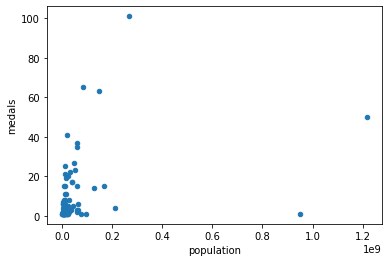

In [34]:
medals.plot(x='population', y='medals', kind='scatter')

Part of the issue is the scale of the variables. For example, countries' populations span several orders of magnitude. We can correct this by using the logarithm of population, which we have already calculated.

<AxesSubplot:xlabel='log_population', ylabel='medals'>

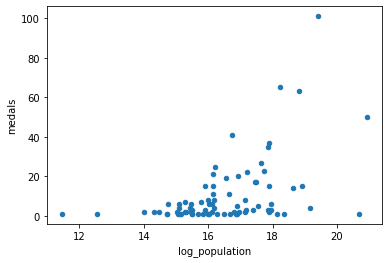

In [35]:
medals.plot(x='log_population', y='medals', kind='scatter')

- This is an improvement, but the relationship is still not adequately modeled by least-squares regression.

- This is due to the fact that the response data are counts. As a result, they tend to have characteristic properties.

    - discrete
    - positive
    - variance grows with mean
- To account for this, we can do two things:
    1. model the medal count on the log scale;
    2. assume Poisson, rather than normal.


# Poisson regression

- So, we will model the logarithm of the expected value as a linear function of our predictors:

$$y_i \sim \text{Poisson}(\lambda_i)$$
$$\log(\lambda_i) = \eta_i = \beta_0 + \beta_1x_{i,1} + 
\cdots + \beta_1x_{i,q},$$


- Log link function forces positive mean.

- Poisson log ikelihood:

$$\log L = \sum_{i=1}^n -\exp(x_i^T\beta) + y_i (x_i^T \beta)- \log(y_i!)$$

- As we have already done, we just need to code the kernel of this likelihood, and optimize!

In [40]:
# Poisson negative log-likelhood
poisson_loglike = lambda beta, X, y: -(-np.exp(X.dot(beta)) + y*X.dot(beta)).sum()

In [41]:
b1, b0 = fmin(poisson_loglike, [0,1], args=(medals[['log_population']].assign(intercept=1).values, 
                                            medals.medals.values))
b0, b1

Optimization terminated successfully.
         Current function value: -1381.299433
         Iterations: 68
         Function evaluations: 131


(-5.297302917060439, 0.44873025169011005)

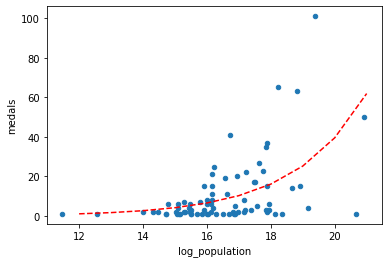

In [42]:
ax = medals.plot(x='log_population', y='medals', kind='scatter')
xvals = np.arange(12, 22)
ax.plot(xvals, np.exp(b0 + b1*xvals), 'r--')